In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [27]:
frame = cv.imread("./video3/frame598.jpg", cv.IMREAD_COLOR)

In [28]:
cv.imshow("frame", frame)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
frameRecortado = frame[0:850, 630:1200]

In [30]:
cv.imshow("frame", frameRecortado)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
frameRecortado.shape

(520, 570, 3)

In [7]:
frameRecortadoBN = cv.cvtColor(frameRecortado, cv.COLOR_BGR2GRAY)

In [8]:
cv.imshow("frame", frameRecortadoBN)
cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
frameRecortadoBN.shape

(520, 570)

In [10]:
frameRecortadoBN

array([[208, 211, 213, ..., 168, 168, 168],
       [211, 214, 217, ..., 168, 168, 168],
       [210, 213, 218, ..., 169, 169, 169],
       ...,
       [228, 229, 229, ..., 193, 193, 193],
       [231, 233, 233, ..., 193, 193, 194],
       [229, 230, 226, ..., 192, 192, 193]], dtype=uint8)

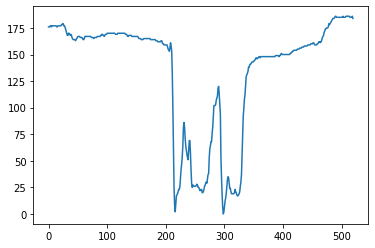

In [11]:
plt.plot(frameRecortadoBN[:,285])
plt.show()

In [12]:
frameRecortadoBN[:,285]

array([176, 176, 176, 177, 177, 176, 177, 177, 177, 177, 177, 177, 177,
       177, 176, 176, 177, 177, 177, 177, 177, 177, 178, 178, 179, 179,
       177, 177, 176, 174, 172, 170, 168, 168, 170, 170, 169, 168, 169,
       168, 166, 165, 164, 164, 164, 164, 163, 164, 165, 166, 167, 167,
       167, 167, 166, 166, 166, 166, 165, 164, 164, 165, 167, 167, 167,
       167, 167, 167, 167, 167, 167, 167, 167, 166, 166, 166, 166, 165,
       166, 166, 166, 166, 166, 167, 167, 167, 167, 167, 167, 168, 168,
       169, 169, 168, 168, 167, 168, 169, 169, 169, 170, 170, 170, 170,
       170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 169, 169, 169,
       169, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170,
       170, 169, 169, 169, 168, 167, 167, 168, 168, 168, 168, 168, 167,
       167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 166, 165, 165,
       165, 165, 164, 164, 164, 164, 165, 165, 165, 165, 165, 165, 165,
       165, 165, 165, 165, 165, 164, 164, 164, 164, 164, 164, 16

In [116]:
frameRecortado1 = frame[350:810, 600:1200]
#aproximadamente 160 frames de radio 810-350

In [117]:
cv.imshow("frame", frameRecortado1)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
def intensidadRegion(nombreVideo, imagenInicial, imagenFinal):
    cantidadImagenes = imagenFinal-imagenInicial
    # El primer arreglo sera de ceros, este es par aguardar todos los perfiles de itnensidades
    intensidadesTodosFrames = np.zeros(520)
    for i in range(imagenInicial, imagenFinal):
        # Se carga el frame
        frame = cv.imread("./%s/frame%d.jpg" % (nombreVideo, i), 0)
        # Se recorta el frame
        frame = np.array(frame[330:850, 630:1200])
        # Se crea arreglo dummy para guardar el perfil de intensidad de cada frame en cada iteracion
        intensidades = frame[:,285]
        # Se stackea el arreglo dummy en uno que guardara todos los  perfiles de intensidades
        intensidadesTodosFrames = np.vstack([intensidadesTodosFrames, intensidades])
    # Se elimina el primer arreglo de ceros, y se devuelve un arreglo con todos los perfiles de itnensidades
    tiempo = np.linspace(0, cantidadImagenes/30, cantidadImagenes)
    return intensidadesTodosFrames[1:,:], tiempo

In [5]:
perfilesIntensidades, t = intensidadRegion("video3", 498, 598)

In [17]:
perfilesIntensidades

array([[174., 174., 174., ..., 183., 183., 181.],
       [174., 174., 174., ..., 184., 182., 182.],
       [174., 174., 174., ..., 184., 183., 181.],
       ...,
       [175., 175., 175., ..., 185., 185., 184.],
       [175., 176., 175., ..., 185., 185., 184.],
       [176., 176., 176., ..., 185., 185., 184.]])

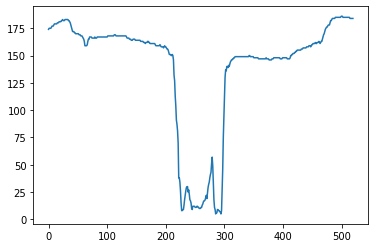

In [7]:
plt.plot(perfilesIntensidades[49])
plt.show()

In [28]:
arregloDiametros = np.array([])
for perfilIntensidad in perfilesIntensidades:
    numeroFrames = 0
    for intensidad in perfilIntensidad:
        # hay que hacer un condicional sobre cada intensidad, establecer un threshold, y guardar el numero de frames cuya intensidad  menores a ese threshold, a ojo el threshold que establece esta entre 150 y 160
        if(intensidad<=160):
            numeroFrames = numeroFrames + 1

    arregloDiametros = np.append(arregloDiametros, numeroFrames)
    arregloRadios = arregloDiametros/2
    arregloRadiosMetros = arregloRadios*0.15/764 #Conversion a metros

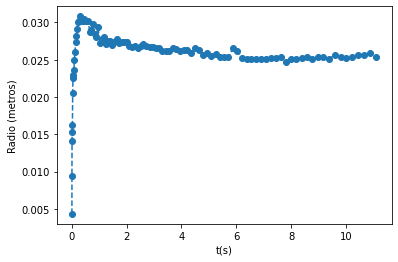

In [29]:
plt.plot(t**2, arregloRadiosMetros, 'o--')
plt.xlabel('t(s)')
plt.ylabel('Radio (metros)')
plt.show()

In [30]:
arregloRadios[0:31]

array([ 22. ,  48. ,  71.5,  78. ,  82.5, 104.5, 117. , 115. , 120.5,
       127. , 132.5, 139.5, 143.5, 148.5, 153. , 154. , 157. , 154.5,
       153.5, 154. , 155. , 154. , 153.5, 153.5, 146. , 147.5, 151.5,
       145. , 142.5, 149.5, 138.5])

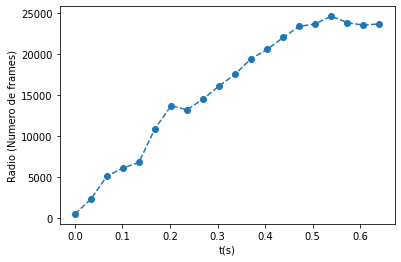

In [43]:

plt.plot(t[0:20], arregloRadios[0:20]**2, 'o--')
plt.xlabel('t(s)')
plt.ylabel('Radio (Numero de frames)')
plt.show()

In [31]:
data = np.array([arregloRadiosMetros,arregloRadios, t]).T
df = pd.DataFrame(data, columns=['radios(metros)','radios(pixeles)', 'tiempo'])

In [32]:
df.to_csv("video3.csv")

In [33]:
df

,radios(metros),radios(pixeles),tiempo
0,0.004319,22.0,0.000000
1,0.009424,48.0,0.033670
2,0.014038,71.5,0.067340
3,0.015314,78.0,0.101010
4,0.016198,82.5,0.134680
...,...,...,...
95,0.025327,129.0,3.198653
96,0.025622,130.5,3.232323
97,0.025622,130.5,3.265993
98,0.025916,132.0,3.299663


In [26]:
frame = cv.imread("./video3/frame498.jpg", 0)
frameRecortado = frame[330:850, 630:1200]
cv.circle(frameRecortado,(285,240), int(arregloRadios[0]),(255,0,255),1)
cv.line(frameRecortado,(285,0),(285,570), (255, 0,255), 1)
cv.imshow('imagen',frameRecortado)
cv.waitKey(0)
cv.destroyAllWindows()